In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
import plotly.graph_objects as go
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from user_hub.user import User
from user_hub import time_box

In [4]:
redditor = User("spez")
redditor.validate_user()
redditor.get_visited_pages()
visited, t_stamp, t_stamp_subreddit = redditor.return_user_attributes()
edges = time_box.process_to_edges(t_stamp_subreddit)

announcements
blog
RoastMe
IAmA
me_irl
AskReddit
thanosdidnothingwrong
mildlyinfuriating


In [5]:
nodes = list(visited.keys()) + list(t_stamp.keys())
G = nx.Graph()
G.add_nodes_from(nodes)
clean_edge = []
for pair in edges:
    if pair not in clean_edge:
        clean_edge.append(pair)
        
G.add_edges_from(clean_edge)

In [7]:
clean_edge

[(1, 'announcements'),
 (1, 'RoastMe'),
 (22, 'announcements'),
 (22, 'IAmA'),
 (20, 'announcements'),
 (21, 'blog'),
 (21, 'announcements'),
 (21, 'IAmA'),
 (23, 'announcements'),
 (23, 'AskReddit'),
 (0, 'announcements'),
 (0, 'mildlyinfuriating'),
 (2, 'announcements'),
 (5, 'me_irl'),
 (19, 'announcements'),
 (17, 'announcements'),
 (18, 'announcements'),
 (6, 'thanosdidnothingwrong'),
 (6, 'announcements')]

In [178]:
labels = {}
for i in range(len(nodes)):
    labels[i] = nodes[i]

In [180]:
visited

{'announcements': 77,
 'blog': 2,
 'RoastMe': 1,
 'IAmA': 16,
 'me_irl': 1,
 'AskReddit': 1,
 'thanosdidnothingwrong': 1,
 'mildlyinfuriating': 1}

In [179]:
# plt.figure(figsize=(10,10))
# pos = nx.spring_layout(G)  # positions for all nodes


# nx.draw_networkx_nodes(G, pos,
#                        nodelist=[node for node in nodes if type(node) is int],
#                        node_color='r',
#                        node_size=400,
#                        alpha=0.5)

# nx.draw_networkx_nodes(G, pos,
#                        nodelist=[node for node in nodes if type(node) is not int],
#                        node_color='b',
#                        node_size=300,
#                        alpha=0.5)

# nx.draw_networkx_edges(G, pos,
#                        edgelist=clean_edge,
#                        width=1, alpha=0.5, edge_color='k')

# nx.draw_networkx_labels(G, pos, labels)
# # nx.draw(G, with_labels=True, node_size=300)

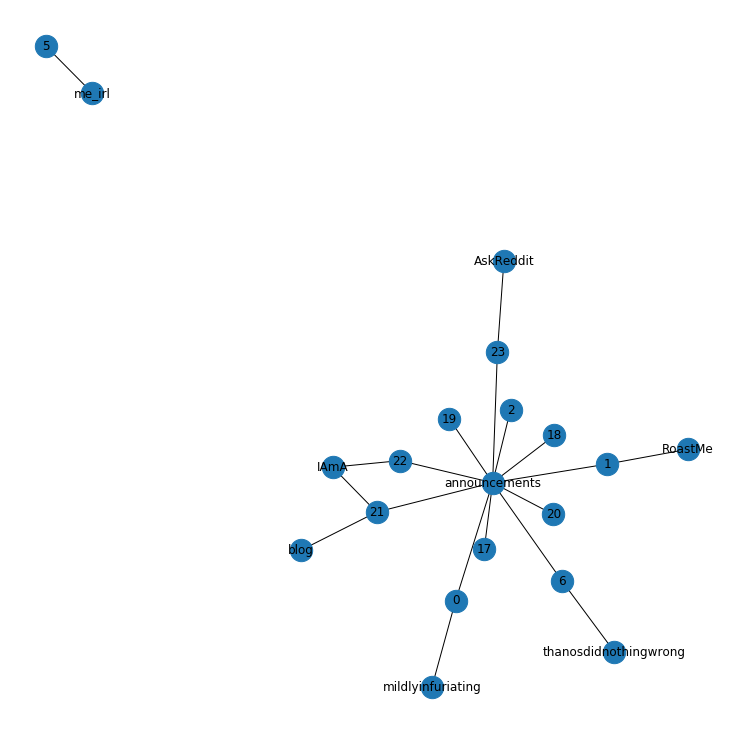

In [183]:
plt.figure(figsize=(10,10))
nx.draw(G, with_labels=True, node_size=500)

In [214]:
locations = nx.nx_agraph.graphviz_layout(G)
locations[0]

(151.89, 183.51)

In [213]:
elements = nx.readwrite.json_graph.cytoscape_data(G).get('elements').get('nodes')
elements[0]

{'data': {'id': 'announcements',
  'value': 'announcements',
  'name': 'announcements'}}

In [227]:
position_0 = {'place_holder':
              {'x':locations[0][0], 'y':locations[0][1]}
             }
list(elements[0].values()) + list(position_0.values())

[{'id': 'announcements', 'value': 'announcements', 'name': 'announcements'},
 {'x': 151.89, 'y': 183.51}]

In [283]:
locations = nx.nx_agraph.graphviz_layout(G)
locations = json.dumps(locations) # convert all keys to string

{'announcements': [248.76, 179.83],
 'blog': [295.89, 348.63],
 'RoastMe': [406.97, 254.84],
 'IAmA': [200.39, 333.04],
 'me_irl': [429.19, 325.64],
 'AskReddit': [400.29, 86.332],
 'thanosdidnothingwrong': [173.46, 18.0],
 'mildlyinfuriating': [70.53, 189.31],
 '1': [328.02, 227.08],
 '22': [213.01, 256.67],
 '20': [189.69, 215.74],
 '21': [259.77, 273.25],
 '23': [333.64, 134.93],
 '0': [151.89, 183.51],
 '2': [311.3, 186.73],
 '5': [500.4, 315.0],
 '19': [186.55, 143.77],
 '17': [290.32, 111.05],
 '18': [251.15, 103.5],
 '6': [203.86, 93.673]}

In [289]:
elements = nx.readwrite.json_graph.cytoscape_data(G).get('elements').get('nodes')
locations = nx.nx_agraph.graphviz_layout(G)
locations = json.dumps(locations) # convert all keys to string
locations = json.loads(locations) # convert stringized dict back to dict
list_pair = []
for i in range(len(elements)):
    node_name = elements[i]['data']['id']
    location = locations.get(node_name)
    element = elements[i]
    position = {'place_holder':
                  {'x':location[0], 'y':location[1]}
                 }
    list_pair.append(list(element.values()) + list(position.values()))

In [309]:
dash_input = []
for elements in list_pair:
    for i in range(2):
        dash_input.append(elements[i])

In [311]:
import dash
import dash_cytoscape as cyto
import dash_html_components as html

app = dash.Dash(__name__)

app.layout = html.Div([
    cyto.Cytoscape(
        id='cytoscape-two-nodes',
        layout={'name': 'preset'},
        style={'width': '100%', 'height': '400px'},
        elements=dash_input
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)


Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Debugger PIN: 226-711-072
Debugger PIN: 226-711-072
Debugger PIN: 226-711-072
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


OSError: [Errno 48] Address already in use

In [ ]:
app = dash.Dash(__name__)

In [ ]:
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.node[edge[0]]['pos']
    x1, y1 = G.node[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.node[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))